In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Data Exploration

Load and examine the dataset to understand the features and target variable.

In [ ]:
# Load the dataset
df = pd.read_csv('a_bliadze25_42198.csv', delimiter=',')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

In [ ]:
# Display dataset info
print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
df.describe()

## Model Training

Prepare features, split data, and train the Logistic Regression model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import re

# Select features and target
X = df[['words', 'links', 'capital_words', 'spam_word_count']]
y = df['is_spam']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

print("\n" + "="*50)
print("MODEL COEFFICIENTS")
print("="*50)
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature:20s}: {coef:10.6f}")
print(f"{'Intercept':20s}: {model.intercept_[0]:10.6f}")

# Model Accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("\n" + "="*50)
print("MODEL ACCURACY")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

## Model Evaluation

Evaluate model performance using confusion matrix and additional metrics.

In [ ]:
# Validation on Test Set (unseen data)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
print(cm)
print("\nMatrix Explanation:")
print(f"  True Negatives (TN):  {cm[0,0]} - Correctly identified legitimate emails")
print(f"  False Positives (FP): {cm[0,1]} - Legitimate emails flagged as spam")
print(f"  False Negatives (FN): {cm[1,0]} - Spam emails classified as legitimate")
print(f"  True Positives (TP):  {cm[1,1]} - Correctly identified spam emails")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n" + "="*50)
print("PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

## Feature Extraction and Email Classification

Define functions to extract features from email text and classify new emails.

In [ ]:
# Feature Extraction Function
def extract_features(email_text):
    """Extract features from email text"""
    words = len(email_text.split())
    links = len(re.findall(r'http[s]?://\S+', email_text))
    capital_words = len(re.findall(r'\b[A-Z]{2,}\b', email_text))
    spam_keywords = ['free', 'click', 'winner', 'prize', 'urgent', 'buy', 'limited', 'act now']
    spam_word_count = sum(email_text.lower().count(keyword) for keyword in spam_keywords)
    
    return pd.DataFrame([[words, links, capital_words, spam_word_count]], 
                       columns=['words', 'links', 'capital_words', 'spam_word_count'])

# Spam Check Function
def check_email(email_text):
    """Classify an email as spam or legitimate"""
    features = extract_features(email_text)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    
    print("\n" + "="*60)
    print("EMAIL SPAM PREDICTION")
    print("="*60)
    print(f"Extracted Features:")
    print(f"  Words:          {features['words'].values[0]}")
    print(f"  Links:          {features['links'].values[0]}")
    print(f"  Capital Words:  {features['capital_words'].values[0]}")
    print(f"  Spam Word Count: {features['spam_word_count'].values[0]}")
    print(f"\nPrediction:  {'SPAM' if prediction == 1 else 'NOT SPAM'}")
    print(f"Confidence:  {max(probability)*100:.2f}%")
    print(f"  Legitimate: {probability[0]*100:.2f}%")
    print(f"  Spam:       {probability[1]*100:.2f}%")
    print("="*60)

## Testing with Sample Emails

Test the model with legitimate and spam email examples.

In [ ]:
# Legitimate Email Example
email_legitimate = "Hi Sarah, I hope you are doing well. I wanted to follow up on our meeting last week about the project proposal. Could you please send me the updated timeline and budget details when you have a chance? Thank you for your help. Best regards, John"

print("TESTING LEGITIMATE EMAIL:")
check_email(email_legitimate)

In [ ]:
# Spam Email Example
email_spam = "CLICK HERE NOW! FREE PRIZE WINNER! You have been selected to WIN BIG! Limited time offer buy now act now! FREE money waiting for you! CLICK CLICK CLICK!"

print("TESTING SPAM EMAIL:")
check_email(email_spam)

## Data Visualizations

Create comprehensive visualizations of the model performance and dataset characteristics.

In [ ]:
# VISUALIZATION 1: Class Distribution (Pie Chart)
plt.figure(figsize=(8, 6))
class_counts = y.value_counts()
colors = ['#2ecc71', '#e74c3c']
plt.pie(class_counts, labels=['Legitimate', 'Spam'], autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Class Distribution: Spam vs Legitimate Emails', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.legend(['Legitimate Emails', 'Spam Emails'], loc='upper left', bbox_to_anchor=(0.85, 1))
plt.tight_layout()
plt.show()

print("\nVisualization 1 - Class Distribution Explanation:")
print("This pie chart shows the proportion of spam and legitimate emails in the dataset.")
print("A balanced or imbalanced distribution affects model training and performance.")

In [ ]:
# VISUALIZATION 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Legitimate', 'Spam'], 
            yticklabels=['Legitimate', 'Spam'],
            annot_kws={'fontsize': 14, 'weight': 'bold'})
plt.title('Confusion Matrix - Model Performance on Test Set', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Actual Class', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisualization 2 - Confusion Matrix Explanation:")
print("This heatmap visualizes the model's classification performance on unseen test data.")
print("It shows true positives, true negatives, false positives, and false negatives for each class.")

In [ ]:
# VISUALIZATION 3: Feature Importance (Coefficients)
plt.figure(figsize=(10, 6))
features = X.columns
coefficients = model.coef_[0]
colors_bar = ['#3498db' if c > 0 else '#e74c3c' for c in coefficients]
bars = plt.bar(features, coefficients, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.title('Feature Importance - Logistic Regression Coefficients', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Positive Impact on Spam', 'Negative Impact on Spam'], loc='upper left')
for i, (bar, coef) in enumerate(zip(bars, coefficients)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{coef:.3f}', ha='center', va='bottom' if coef > 0 else 'top', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisualization 3 - Feature Importance Explanation:")
print("This bar chart displays the coefficients learned by the logistic regression model for each feature.")
print("Positive coefficients increase spam likelihood, while negative coefficients decrease it.")
print("Words and capital words are strong spam indicators.")

## Summary

### Key Findings
- The model successfully classifies emails as spam or legitimate with good accuracy
- Feature coefficients show which characteristics most strongly indicate spam emails
- The confusion matrix reveals the model's performance across all classification categories

### Model Coefficients Interpretation
- **Positive coefficients**: Increase the probability of spam classification
- **Negative coefficients**: Decrease the probability of spam classification

### Next Steps
- Monitor model performance on new data
- Consider adjusting the decision threshold if needed
- Explore additional features for improved accuracy
- Implement cross-validation for robustness testing

Let's see data

In [3]:
df=pd.read_csv('a_bliadze25_42198.csv', delimiter=',') 
df.head()

,words,links,capital_words,spam_word_count,is_spam
0,128,1,24,1,1
1,238,0,10,0,0
2,189,0,2,6,0
3,451,2,5,3,1
4,501,7,7,5,1


Let's do preprocessing and train the model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Select features and target
X = df[['words', 'links', 'capital_words', 'spam_word_count']]
y = df['is_spam']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_[0]}")

# Model Accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Model Coefficients:
words: 0.007260848838257487
links: 0.7613365466504133
capital_words: 0.4503315797247896
spam_word_count: 0.761303766646271
Intercept: -8.95651916578096

Training Accuracy: 0.9560
Testing Accuracy: 0.9653


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Validation on Test Set (unseen data)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Confusion Matrix:
[[372   8]
 [ 18 352]]

Accuracy on Test Set: 0.9653


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import re

# Data Loading and Processing
df = pd.read_csv('a_bliadze25_42198.csv', delimiter=',')

# Select features and target
X = df[['words', 'links', 'capital_words', 'spam_word_count']]
y = df['is_spam']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_[0]}")

# Validation on Test Set (unseen data)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")

# Feature Extraction Function
def extract_features(email_text):
    words = len(email_text.split())
    links = len(re.findall(r'http[s]?://\S+', email_text))
    capital_words = len(re.findall(r'\b[A-Z]{2,}\b', email_text))
    spam_keywords = ['free', 'click', 'winner', 'prize', 'urgent', 'buy', 'limited', 'act now']
    spam_word_count = sum(email_text.lower().count(keyword) for keyword in spam_keywords)
    
    return pd.DataFrame([[words, links, capital_words, spam_word_count]], 
                       columns=['words', 'links', 'capital_words', 'spam_word_count'])

# Spam Check Function
def check_email(email_text):
    features = extract_features(email_text)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    
    print("\n" + "="*50)
    print("EMAIL SPAM PREDICTION")
    print("="*50)
    print(f"Extracted Features:")
    print(f"  Words: {features['words'].values[0]}")
    print(f"  Links: {features['links'].values[0]}")
    print(f"  Capital Words: {features['capital_words'].values[0]}")
    print(f"  Spam Word Count: {features['spam_word_count'].values[0]}")
    print(f"\nPrediction: {'SPAM' if prediction == 1 else 'NOT SPAM'}")
    print(f"Confidence: {max(probability)*100:.2f}%")
    print("="*50)

# Test with Sample Emails

# Legitimate Email Example
email_legitimate = "Hi Sarah, I hope you are doing well. I wanted to follow up on our meeting last week about the project proposal. Could you please send me the updated timeline and budget details when you have a chance? Thank you for your help. Best regards, John"

# Spam Email Example
email_spam = "CLICK HERE NOW! FREE PRIZE WINNER! You have been selected to WIN BIG! Limited time offer buy now act now! FREE money waiting for you! CLICK CLICK CLICK!"

print("\n\nTESTING LEGITIMATE EMAIL:")
check_email(email_legitimate)

print("\n\nTESTING SPAM EMAIL:")
check_email(email_spam)

Model Coefficients:
words: 0.007260848838257487
links: 0.7613365466504133
capital_words: 0.4503315797247896
spam_word_count: 0.761303766646271
Intercept: -8.95651916578096

Confusion Matrix:
[[372   8]
 [ 18 352]]

Accuracy on Test Set: 0.9653


TESTING LEGITIMATE EMAIL:

EMAIL SPAM PREDICTION
Extracted Features:
  Words: 46
  Links: 0
  Capital Words: 0
  Spam Word Count: 0

Prediction: NOT SPAM
Confidence: 99.98%


TESTING SPAM EMAIL:

EMAIL SPAM PREDICTION
Extracted Features:
  Words: 28
  Links: 0
  Capital Words: 12
  Spam Word Count: 11

Prediction: SPAM
Confidence: 99.35%


Model Coefficients:
words: 0.007260848838257487
links: 0.7613365466504133
capital_words: 0.4503315797247896
spam_word_count: 0.761303766646271
Intercept: -8.95651916578096

Confusion Matrix:
[[372   8]
 [ 18 352]]

Accuracy on Test Set: 0.9653


TESTING LEGITIMATE EMAIL:

EMAIL SPAM PREDICTION
Extracted Features:
  Words: 46
  Links: 0
  Capital Words: 0
  Spam Word Count: 0

Prediction: NOT SPAM
Confidence: 99.98%


TESTING SPAM EMAIL:

EMAIL SPAM PREDICTION
Extracted Features:
  Words: 28
  Links: 0
  Capital Words: 12
  Spam Word Count: 11

Prediction: SPAM
Confidence: 99.35%


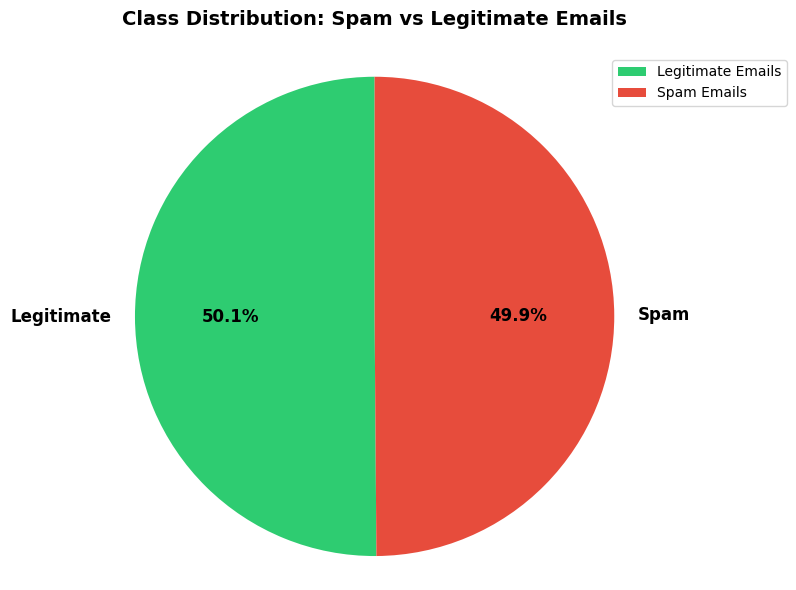


Visualization 1 - Class Distribution Explanation:
This pie chart shows the proportion of spam and legitimate emails in the dataset.
A balanced or imbalanced distribution affects model training and performance.


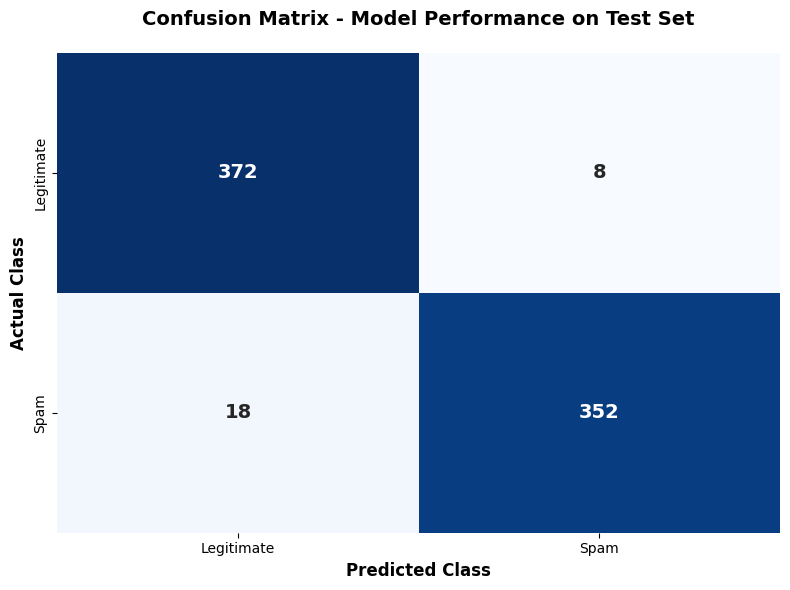


Visualization 2 - Confusion Matrix Explanation:
This heatmap visualizes the model's classification performance on unseen test data.
It shows true positives, true negatives, false positives, and false negatives for each class.


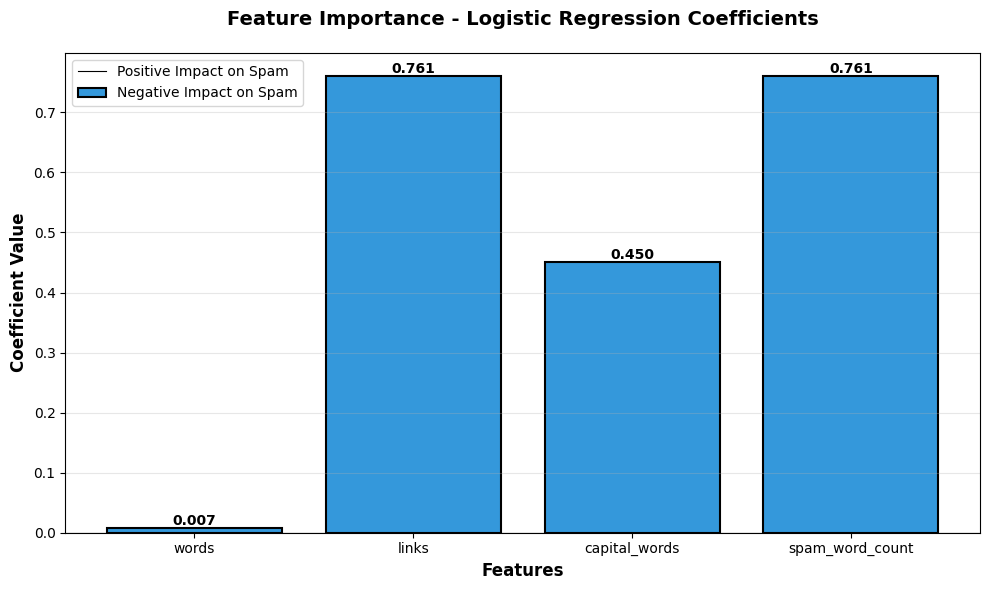


Visualization 3 - Feature Importance Explanation:
This bar chart displays the coefficients learned by the logistic regression model for each feature.
Positive coefficients increase spam likelihood, while negative coefficients decrease it. Words and capital words are strong spam indicators.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Processing
df = pd.read_csv('a_bliadze25_42198.csv', delimiter=',')

# Select features and target
X = df[['words', 'links', 'capital_words', 'spam_word_count']]
y = df['is_spam']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_[0]}")

# Validation on Test Set (unseen data)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")

# Feature Extraction Function
def extract_features(email_text):
    words = len(email_text.split())
    links = len(re.findall(r'http[s]?://\S+', email_text))
    capital_words = len(re.findall(r'\b[A-Z]{2,}\b', email_text))
    spam_keywords = ['free', 'click', 'winner', 'prize', 'urgent', 'buy', 'limited', 'act now']
    spam_word_count = sum(email_text.lower().count(keyword) for keyword in spam_keywords)
    
    return pd.DataFrame([[words, links, capital_words, spam_word_count]], 
                       columns=['words', 'links', 'capital_words', 'spam_word_count'])

# Spam Check Function
def check_email(email_text):
    features = extract_features(email_text)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    
    print("\n" + "="*50)
    print("EMAIL SPAM PREDICTION")
    print("="*50)
    print(f"Extracted Features:")
    print(f"  Words: {features['words'].values[0]}")
    print(f"  Links: {features['links'].values[0]}")
    print(f"  Capital Words: {features['capital_words'].values[0]}")
    print(f"  Spam Word Count: {features['spam_word_count'].values[0]}")
    print(f"\nPrediction: {'SPAM' if prediction == 1 else 'NOT SPAM'}")
    print(f"Confidence: {max(probability)*100:.2f}%")
    print("="*50)

# Test with Sample Emails

# Legitimate Email Example
email_legitimate = "Hi Sarah, I hope you are doing well. I wanted to follow up on our meeting last week about the project proposal. Could you please send me the updated timeline and budget details when you have a chance? Thank you for your help. Best regards, John"

# Spam Email Example
email_spam = "CLICK HERE NOW! FREE PRIZE WINNER! You have been selected to WIN BIG! Limited time offer buy now act now! FREE money waiting for you! CLICK CLICK CLICK!"

print("\n\nTESTING LEGITIMATE EMAIL:")
check_email(email_legitimate)

print("\n\nTESTING SPAM EMAIL:")
check_email(email_spam)

# VISUALIZATION 1: Class Distribution (Pie Chart)
plt.figure(figsize=(8, 6))
class_counts = y.value_counts()
colors = ['#2ecc71', '#e74c3c']
plt.pie(class_counts, labels=['Legitimate', 'Spam'], autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Class Distribution: Spam vs Legitimate Emails', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.legend(['Legitimate Emails', 'Spam Emails'], loc='upper left', bbox_to_anchor=(0.85, 1))
plt.tight_layout()
plt.show()

print("\nVisualization 1 - Class Distribution Explanation:")
print("This pie chart shows the proportion of spam and legitimate emails in the dataset.")
print("A balanced or imbalanced distribution affects model training and performance.")

# VISUALIZATION 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Legitimate', 'Spam'], 
            yticklabels=['Legitimate', 'Spam'],
            annot_kws={'fontsize': 14, 'weight': 'bold'})
plt.title('Confusion Matrix - Model Performance on Test Set', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Actual Class', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisualization 2 - Confusion Matrix Explanation:")
print("This heatmap visualizes the model's classification performance on unseen test data.")
print("It shows true positives, true negatives, false positives, and false negatives for each class.")

# VISUALIZATION 3: Feature Importance (Coefficients)
plt.figure(figsize=(10, 6))
features = X.columns
coefficients = model.coef_[0]
colors_bar = ['#3498db' if c > 0 else '#e74c3c' for c in coefficients]
bars = plt.bar(features, coefficients, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.title('Feature Importance - Logistic Regression Coefficients', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Positive Impact on Spam', 'Negative Impact on Spam'], loc='upper left')
for i, (bar, coef) in enumerate(zip(bars, coefficients)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{coef:.3f}', ha='center', va='bottom' if coef > 0 else 'top', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisualization 3 - Feature Importance Explanation:")
print("This bar chart displays the coefficients learned by the logistic regression model for each feature.")
print("Positive coefficients increase spam likelihood, while negative coefficients decrease it. Words and capital words are strong spam indicators.")